**DATA CLEANSING**

In [1]:
# import library
import pandas as pd
pd.options.display.max_columns = 50

In [2]:
# Import dataset
df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

# Jumlah baris dan kolom dataset
print('Jumlah baris dan kolom data:',df_load.shape)

# Tampilkan 5 data teratas
print('\n')
print(df_load.head(5))

# Tampilkan Jumlah ID unik
print('\nJumlah ID Unik:',df_load['customerID'].nunique())

Jumlah baris dan kolom data: (7113, 22)


   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  

In [3]:
# Filter ID Nomor Pelanggan dengan Format Tertentu
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis=1)
print('Jumlah ID yang terfilter adalah', df_load['customerID'].count())

Jumlah ID yang terfilter adalah 7006


In [4]:
# Filter Duplikasi ID Number Pelanggan
df_load.drop_duplicates()

df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

print('Hasil jumlah ID Customerr yang telah dihilangkan duplikasinya adalah', df_load['customerID'].count())

Hasil jumlah ID Customerr yang telah dihilangkan duplikasinya adalah 6993


In [5]:
# Menghilangkan Missing Values dengan Menghapus Rows
print('Total missing values data dari kolom Churn adalah', df_load['Churn'].isnull().sum())

df_load = df_load.dropna(subset=['Churn'])

print('\nTotal rows dan column Data setelah dihapus data missing values adalah', df_load.shape)

Total missing values data dari kolom Churn adalah 43

Total rows dan column Data setelah dihapus data missing values adalah (6950, 22)


In [6]:
# Mengisi Missing Values dengan Pengisian nilai tertentu
print('Status Missing Values adalah:', df_load.isnull().any())
print('\nJumlah Missing Values untuk setiap kolom adalah:', df_load.isnull().sum().sort_values(ascending=False))

# Mengisi nilai missing value pada kolom 'tenure' dengan nilai 11
df_load['tenure'].fillna(11, inplace=True)

# Mengisi nilai missing value pada kolom 'MonthlyCharges' dan 'TotalCharges' dengan nilai median dari kedua kolom
for col_name in (['MonthlyCharges','TotalCharges']):
  median = df_load[col_name].median()
  df_load[col_name].fillna(median, inplace=True)

print('\nJumlah Missing Values setelah di-imputer datanya adalah :')
print(df_load.isnull().sum().sort_values(ascending=False))  

Status Missing Values adalah: UpdatedAt           False
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure               True
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges       True
TotalCharges         True
Churn               False
dtype: bool

Jumlah Missing Values untuk setiap kolom adalah: tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtecti

Persebaran data sebelum dihilangkan Outlier : 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


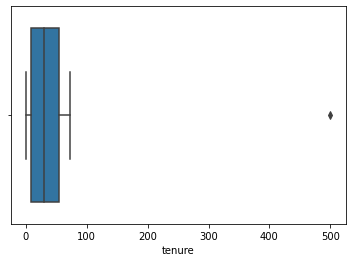

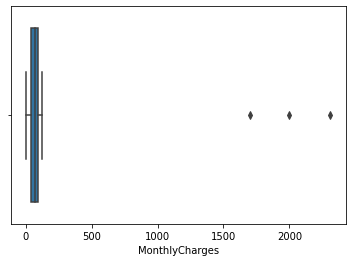

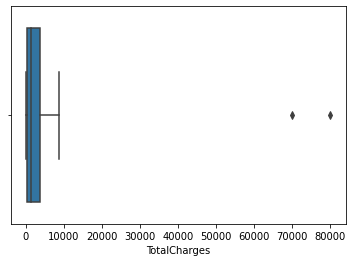

In [7]:
# Deteksi Outlier
print('Persebaran data sebelum dihilangkan Outlier : ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Membuat Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot untuk kolom 'tenure'
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

# Box Plot untuk kolom 'MonthlyCharges'
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

# Box Plot untuk kolom 'TotalCharges'
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

In [8]:
# Menghilangkan Outlier

# Menghitung Q1 dan Q3
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25))
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75))

IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
print('Nilai maksimum dari masing-masing variabel adalah :')
print(maximum)
minimum = Q1 - (1.5 * IQR)
print('\nNilai minimum dari masing-masing variabel adalah :')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran nilai data setelah dihilangkan Outlier :')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai maksimum dari masing-masing variabel adalah :
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai minimum dari masing-masing variabel adalah :
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran nilai data setelah dihilangkan Outlier :
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


In [9]:
# Mendeteksi Nilai yang Tidak Standar
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                      'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                      'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
  print('\nUnique Values Count\033[1m'+' Before Standardized\033[0m Variable', col_name)
  print(df_load[col_name].value_counts())


Unique Values Count Before Standardized Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Before Stand

In [10]:
# Standarisasi Variable Kategorik

df_load = df_load.replace(to_replace=['Wanita','Laki-Laki','Iya','Churn'], value=['Female','Male','Yes','Yes'])

for col_name in list(['gender','Dependents','Churn']):
  print('\nUnique Values Count\033[1m'+' After Standardized\033[0m Variable', col_name)
  print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


In [11]:
# Exploratory Data Analysis

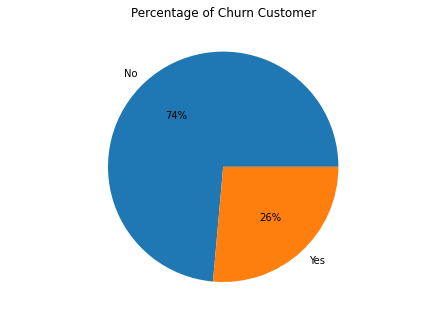

In [14]:
# Visualisasi Persentase Churn

import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df_load['Churn'].value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Percentage of Churn Customer')
plt.show()

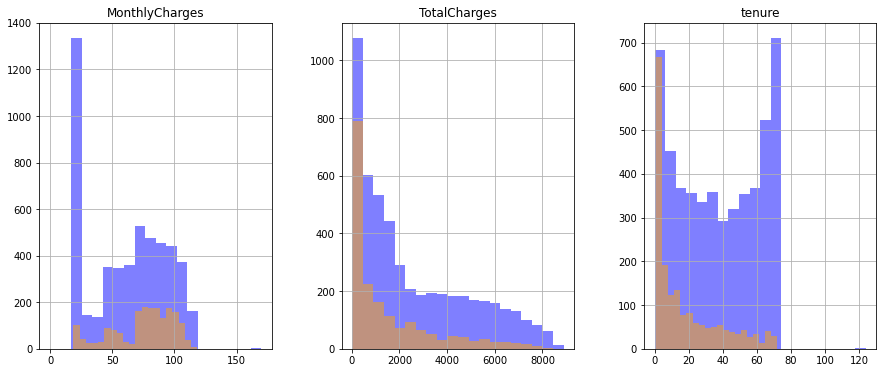

In [15]:
# EDA Variabel Numerik ('MonthlyCharges','TotalCharges','tenure')

numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
df_load[df_load.Churn=='No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn=='Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

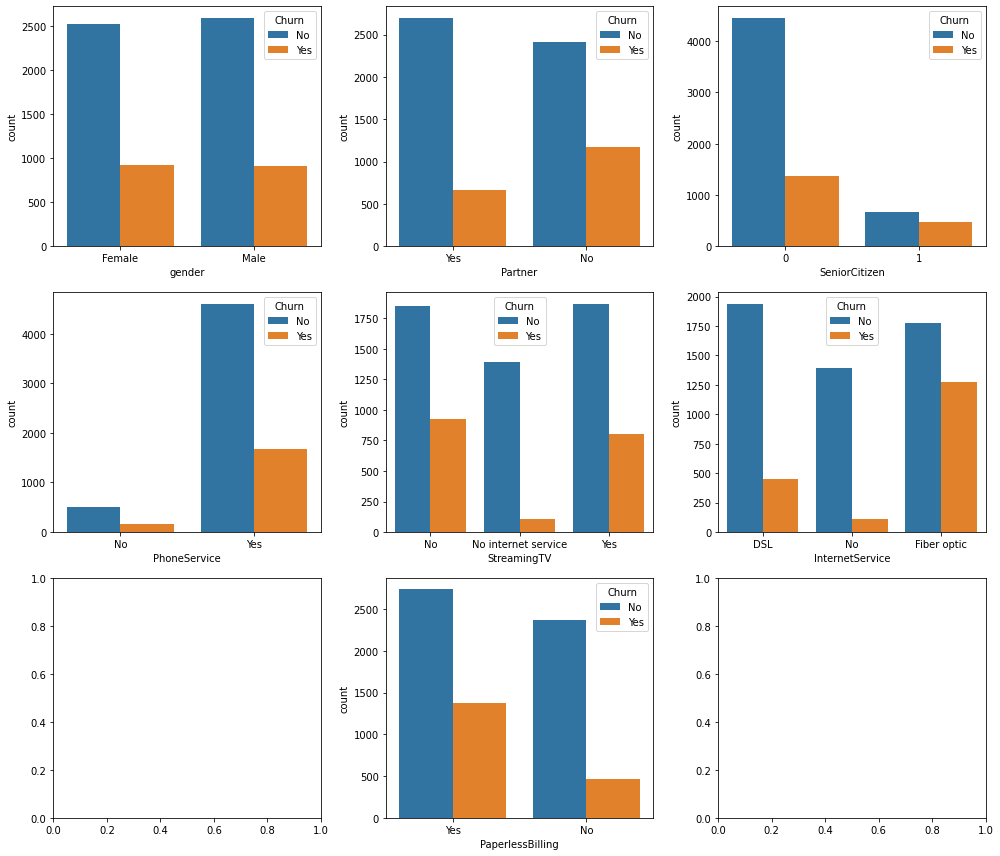

In [16]:
# EDA Variabel Kategorik ('gender','Partner','SeniorCitizen','PhoneService','StreamingTV','InternetService','PaperlessBilling')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [17]:
# PreProcessing Data

In [18]:
# Menghapus Kolom yang Tidak Diperlukan

cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
print(cleaned_df.head())

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No     1.0           No   
4727    Male              0     Yes         No    60.0          Yes   
4738    Male              0      No         No     5.0          Yes   
4737  Female              0     Yes         No    72.0          Yes   
4736  Female              0     Yes        Yes    56.0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
0     No phone service             DSL                   No   
4727                No              No  No internet service   
4738               Yes     Fiber optic                   No   
4737               Yes     Fiber optic                  Yes   
4736               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
0                     Yes                   No                   No   
4727  No internet service  No internet service  No i

In [19]:
# Encoding Data
from sklearn.preprocessing import LabelEncoder

for column in cleaned_df.columns:
  if cleaned_df[column].dtype == np.number : continue
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

print(cleaned_df.describe())  

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  6950.000000    6950.000000  6950.000000  6950.000000  6950.000000   
mean      0.504317       0.162302     0.483309     0.299281    32.423165   
std       0.500017       0.368754     0.499757     0.457976    24.581073   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000   124.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   6950.000000    6950.000000      6950.000000     6950.000000   
mean       0.903741       0.940863         0.872950        0.789496   
std        0.294967       0.948880         0.737618        0.859795   
min        0.000000       0.000

In [21]:
# Splitting Dataset
from sklearn.model_selection import train_test_split

X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Jumlah baris dan kolom dari x_train adalah:',x_train.shape,',sedangkan Jumlah baris dan kolom dari y_train adalah:',y_train.shape)
print('Persentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:',x_test.shape,',sedangkan Jumlah baris dan kolom dari y_test adalah:',y_test.shape)
print('Persentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 19) ,sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Persentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 19) ,sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Persentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


In [22]:
# Creating Model

In [23]:
# Modelling : Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
# Metrics Performance Model Training Data
from sklearn.metrics import classification_report

# Predict model based on training data
y_train_pred = log_model.predict(x_train)

# Result of Classification Report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      3575
           1       0.64      0.57      0.60      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.73      0.73      4865
weighted avg       0.79      0.80      0.80      4865



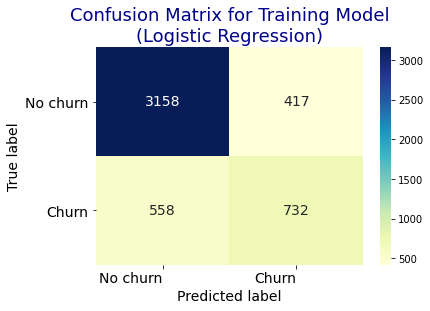

In [25]:
# Visualization of Performance Model Training Data
from sklearn.metrics import confusion_matrix

# Form confusion_matrix as DataFrame
confusion_matrix_df_lr = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion_matrix_df_lr
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_lr, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [26]:
# Metrics Performance Model Testing Data

# Predict model based on testing data
y_test_pred = log_model.predict(x_test)

# Result of Classification Report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.66      0.54      0.60       546

    accuracy                           0.81      2085
   macro avg       0.75      0.72      0.74      2085
weighted avg       0.80      0.81      0.80      2085



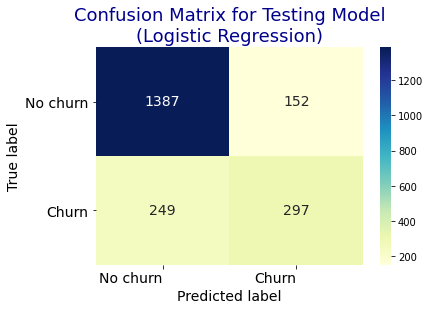

In [27]:
# Visualization of Performance Model Testing Data

# Form confusion_matrix as DataFrame
confusion_matrix_df_lrtest = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion_matrix_df_lrtest
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_lrtest, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [28]:
# Modelling : Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rdf_model = RandomForestClassifier().fit(x_train,y_train)
print(rdf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [29]:
# Metrics Performance Model Training Data

# Predict model based on training data
y_train_pred = rdf_model.predict(x_train)

# Result of Classification Report
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      1290

    accuracy                           1.00      4865
   macro avg       1.00      1.00      1.00      4865
weighted avg       1.00      1.00      1.00      4865



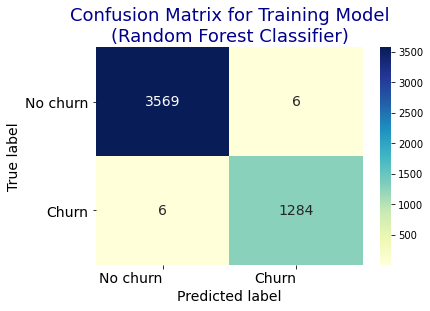

In [30]:
# Visualization of Performance Model Training Data

# Form confusion_matrix as DataFrame
confusion_matrix_df_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion_matrix_df_rf
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [31]:
# Metrics Performance Model Testing Data

# Predict model based on testing data
y_test_pred = rdf_model.predict(x_test)

# Result of Classification Report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.65      0.47      0.54       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



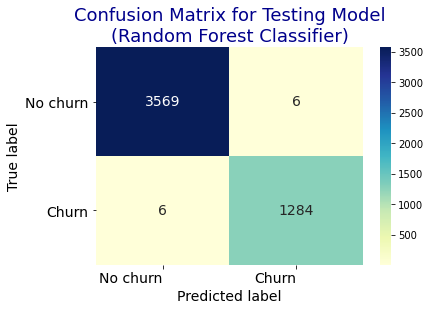

In [32]:
# Visualization of Performance Model Testing Data

# Form confusion_matrix as DataFrame
confusion_matrix_df_rft = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion_matrix_df_rf
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_rft, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [33]:
# Modelling : Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier().fit(x_train,y_train)
print(gbt_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [34]:
# Metrics Performance Model Training Data

# Predict model based on training data
y_train_pred = gbt_model.predict(x_train)

# Result of Classification Report
print('Classification Report Training Model (Gradient Boosting Classifier):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3575
           1       0.73      0.58      0.64      1290

    accuracy                           0.83      4865
   macro avg       0.79      0.75      0.77      4865
weighted avg       0.82      0.83      0.82      4865



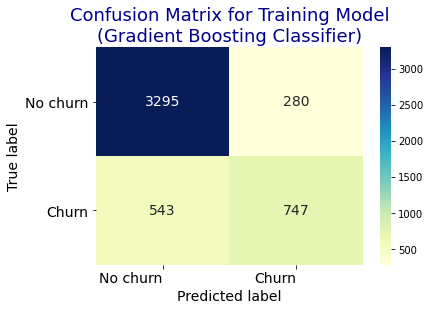

In [35]:
# Visualization of Performance Model Training Data

# Form confusion_matrix as DataFrame
confusion_matrix_df_gb = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion_matrix_df_rf
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_gb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [36]:
# Metrics Performance Model Testing Data

# Predict model based on testing data
y_test_pred = gbt_model.predict(x_test)

# Result of Classification Report
print('Classification Report Testing Model (Gradient Boosting Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1539
           1       0.68      0.51      0.59       546

    accuracy                           0.81      2085
   macro avg       0.76      0.71      0.73      2085
weighted avg       0.80      0.81      0.80      2085



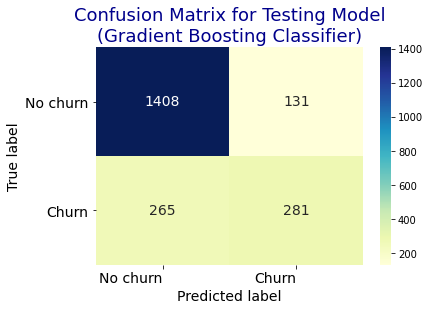

In [37]:
# Visualization of Performance Model Testing Data

# Form confusion_matrix as DataFrame
confusion_matrix_df_gbt = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn','Churn'), ('No churn','Churn'))

# Plot confusion_matrix_df_rf
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df_gbt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()